# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Moh. Aldi Rohmatulloh]
- **Email:** [mc525d5y0147@student.devacademy.id]
- **ID Dicoding:** [MC525D5Y0147]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren Temperatur wilayah Dingling dalam periode tahun 2013 hingga 2017?
- Bagaimana tren Tekanan pada Atmosfer pada wilayah Dingling dalam periode tahun 2013 hingga 2017?

## Import Semua Packages/Library yang Digunakan

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [89]:
df = pd.read_csv("Data/PRSA_Data_Dingling_20130301-20170228.csv")
df1 = pd.read_csv("Data/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
df2 = pd.read_csv("Data/PRSA_Data_Wanshouxigong_20130301-20170228.csv")
df3 = pd.read_csv("Data/PRSA_Data_Wanliu_20130301-20170228.csv")
df4 = pd.read_csv("Data/PRSA_Data_Huairou_20130301-20170228.csv")

In [90]:
df2017_1 = df[df["year"] == 2017]
df2017_2 = df1[df1["year"] == 2017]
df2017_3 = df2[df2["year"] == 2017]
df2017_4 = df3[df3["year"] == 2017]
df2017_5 = df4[df4["year"] == 2017]

df_combined = pd.concat([df2017_1, df2017_2, df2017_3, df2017_4, df2017_5], ignore_index=True)

df_combined.to_csv("Data/main_data.csv", index=False)

In [91]:
main_data = pd.read_csv("Data/main_data.csv")
main_data.sample(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
2657,34890,2017,2,21,17,37.0,37.0,6.0,42.0,800.0,30.0,-1.400,1023.20,-5.6,0.0,ESE,2.3,Nongzhanguan
3864,34681,2017,2,13,0,140.0,170.0,35.0,123.0,3500.0,2.0,-2.000,1023.50,-9.8,0.0,ENE,1.0,Wanshouxigong
6331,34316,2017,1,28,19,238.0,313.0,32.0,73.0,3100.0,2.0,-1.475,1011.25,-9.5,0.0,NW,1.9,Huairou
625,34274,2017,1,27,1,9.0,9.0,4.0,7.0,400.0,91.0,-1.760,1024.00,-15.7,0.0,NW,3.8,Dingling
4609,34010,2017,1,16,1,82.0,90.0,10.0,73.0,1300.0,9.0,-3.425,1027.50,-8.2,0.0,NE,1.2,Wanliu
211,33860,2017,1,9,19,60.0,80.0,12.0,57.0,1100.0,25.0,0.800,1013.00,-11.5,0.0,SE,2.0,Dingling
1804,34037,2017,1,17,4,117.0,125.0,25.0,73.0,2400.0,11.0,-1.700,1027.00,-5.7,0.0,SE,1.4,Nongzhanguan
4076,34893,2017,2,21,20,59.0,64.0,2.0,58.0,900.0,17.0,-2.600,1022.60,-4.3,0.5,SE,1.5,Wanshouxigong
3951,34768,2017,2,16,15,5.0,16.0,2.0,17.0,300.0,70.0,6.600,1015.70,-17.5,0.0,ENE,6.0,Wanshouxigong
2033,34266,2017,1,26,17,9.0,103.0,2.0,10.0,200.0,72.0,7.875,1020.00,-14.2,0.0,NE,5.0,Nongzhanguan


**Insight:**
- Dari proses Gathering data yang dilakukan diketahui bahwa dataset tersebut merupakan sebuah dataset yabg berisi data kualitas udara pada stasiun Dingling yang pada tanggal 1 Naret 2013 hingga 28 Februari 2017. 
- Data dalam dataset tersebut memiliki total 35063 row dengan 18 kolom yaitu terdiri atas, year, month, day, hour, PM2.5, pm10, SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, WSPM, station.
- Dataset tersebut memberikan beberapa informasi penting yang dapat dimanfaatkan untuk tahap analisis, informasi tersebut berupa informasi waktu, kualiatas udara, Faktor Cuaca, Faktor angin, dan Stasiun.

### Assessing Data

### Memeriksa tipe data dari setiap kolom pada dingling_df menggunakan method info()

In [92]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7080 entries, 0 to 7079
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       7080 non-null   int64  
 1   year     7080 non-null   int64  
 2   month    7080 non-null   int64  
 3   day      7080 non-null   int64  
 4   hour     7080 non-null   int64  
 5   PM2.5    6984 non-null   float64
 6   PM10     6989 non-null   float64
 7   SO2      6981 non-null   float64
 8   NO2      6978 non-null   float64
 9   CO       6878 non-null   float64
 10  O3       6972 non-null   float64
 11  TEMP     7023 non-null   float64
 12  PRES     7026 non-null   float64
 13  DEWP     7023 non-null   float64
 14  RAIN     7025 non-null   float64
 15  wd       6915 non-null   object 
 16  WSPM     7046 non-null   float64
 17  station  7080 non-null   object 
dtypes: float64(11), int64(5), object(2)
memory usage: 995.8+ KB


### Memeriksa missing values pada dingling_df menggunakan kombinasi method isna() dan method sum()

In [93]:
main_data.isna().sum()

No           0
year         0
month        0
day          0
hour         0
PM2.5       96
PM10        91
SO2         99
NO2        102
CO         202
O3         108
TEMP        57
PRES        54
DEWP        57
RAIN        55
wd         165
WSPM        34
station      0
dtype: int64

 ### Memeriksa Duplikasi Data yang pada dingling_df menggunakan method duplicated()

In [94]:
print("Jumlah duplikasi: ", main_data.duplicated().sum())

Jumlah duplikasi:  0


### Memeriksa parameter statistik dari kolom numerik yang terdapat pada dingling_df menggunakan method describe()

In [123]:
main_data.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,7080.000000,7080.0,7080.000000,7080.000000,7080.000000,6984.000000,6989.000000,6981.000000,6978.000000,6878.000000,6972.000000,7023.000000,7026.000000,7023.000000,7025.000000,7046.000000
mean,34356.500000,2017.0,1.474576,15.288136,11.500000,89.092640,104.758191,16.535167,53.078676,1525.646990,41.353127,0.203083,1021.291376,-13.457810,0.002932,1.947431
std,408.792759,0.0,0.499388,8.577379,6.922675,109.414697,118.478006,17.855888,41.957963,1681.094177,30.303378,4.851919,6.339231,6.313306,0.040392,1.329541
min,33649.000000,2017.0,1.000000,1.000000,0.000000,2.000000,3.000000,1.000000,2.000000,100.000000,1.000000,-13.425000,997.100000,-31.300000,0.000000,0.000000
25%,34002.750000,2017.0,1.000000,8.000000,5.750000,12.000000,23.000000,5.000000,17.000000,400.000000,11.000000,-3.000000,1017.000000,-18.700000,0.000000,1.000000
50%,34356.500000,2017.0,1.000000,15.000000,11.500000,43.000000,63.000000,10.000000,46.000000,800.000000,40.000000,-0.400000,1021.400000,-13.100000,0.000000,1.600000
75%,34710.250000,2017.0,2.000000,23.000000,17.250000,128.000000,143.000000,22.000000,80.000000,2100.000000,67.000000,2.900000,1026.000000,-8.100000,0.000000,2.500000
max,35064.000000,2017.0,2.000000,31.000000,23.000000,835.000000,952.000000,257.000000,251.000000,10000.000000,119.000000,16.200000,1036.600000,0.900000,1.000000,9.600000


**Insight:**
- Dalam proses pertama dalam tahap Accessing data diketahui bahwa tidak ada masalah untuk tipedata setiap kolom yang ada pada dataset dingling_df, akan tetapi terdapat terlalu banyak missing values pada beberapa kolom utama.
- Setelah dilakukan pemeriksaan missing values dapat diketahui jumlah missing values pada beberapa kolom utama yaitu antara lain sebagai berikut :
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
- Setelah melakukan pemeriksaan duplikasi data daoat diketahui vahwa dakam dataset dingling_df tidak terjadi duplikasi data, hal tersebut dibuktikan dengan hasil jumlah duplikasi yang bernilai 0.
- Selanjutnya dalam pemeriksaan paraameter statistik tidak terdapat keanehan pada setiap parameter statistik pada dataset dingling_df.

### Cleaning Data

### Membuat kolom baru datetime 

In [124]:
main_data["datetime"] = pd.to_datetime(main_data[["year", "month", "day", "hour"]])
main_data.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
4109,34926,2017,2,23,5,14.0,16.0,5.0,27.0,600.0,52.0,-0.20,1025.4,-12.2,0.0,N,1.4,Wanshouxigong,2017-02-23 05:00:00
2048,34281,2017,1,27,8,11.0,13.0,10.0,50.0,600.0,19.0,-5.65,1029.0,-14.1,0.0,SW,1.2,Nongzhanguan,2017-01-27 08:00:00
5569,34970,2017,2,25,1,7.0,10.0,9.0,58.0,700.0,29.0,-0.10,1019.3,-8.3,0.0,S,1.2,Wanliu,2017-02-25 01:00:00
5158,34559,2017,2,7,22,117.0,129.0,13.0,92.0,2300.0,59.0,-2.80,1024.6,-7.1,0.0,NW,0.0,Wanliu,2017-02-07 22:00:00
3954,34771,2017,2,16,18,9.0,23.0,2.0,29.0,400.0,57.0,5.50,1020.1,-17.0,0.0,NE,3.6,Wanshouxigong,2017-02-16 18:00:00


### Menampilkan missing values

In [127]:
main_data[main_data["PM2.5"].isna()]
main_data.sample(3)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
2160,34393,2017,2,1,0,7.0,22.0,3.0,12.0,300.0,61.0,0.3,1029.4,-22.0,0.0,NNE,2.3,Nongzhanguan,2017-02-01 00:00:00
1457,33690,2017,1,2,17,243.0,243.0,15.0,114.0,3800.0,47.0,3.6,1020.8,-7.5,0.0,SW,1.9,Nongzhanguan,2017-01-02 17:00:00
6454,34439,2017,2,2,22,89.0,97.0,23.0,41.0,1900.0,32.0,-3.3,1017.4,-17.3,0.0,NW,1.6,Huairou,2017-02-02 22:00:00


### Melakukan interpolasi pada beberapa kolom

In [ ]:
interpolasi = ["PM2.5", "PM10", "SO2", "NO2", "O3", "TEMP", "PRES", "DEWP", "WSPM"]
for interpol in interpolasi:
    main_data[interpol] = main_data[interpol].interpolate()

main_data.sample(10)

In [130]:
main_data.to_csv("Data/data_cleaned.csv", index=False)

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore Data yang sudah dibersihkan

### Melihat Rangkuman Parameter Statistik dingling_df

In [131]:
main_data.describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
count,7080.000000,7080.0,7080.000000,7080.000000,7080.000000,7080.000000,7080.000000,7080.000000,7080.000000,6878.000000,7080.000000,7080.000000,7080.000000,7080.000000,7025.000000,6915,7080.000000,7080,7080
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,5,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Dingling,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1358,NaN,1416,NaN
mean,34356.500000,2017.0,1.474576,15.288136,11.500000,88.660876,104.444350,16.506921,52.932133,1525.646990,41.356356,0.193358,1021.304917,-13.453277,0.002932,NaN,1.949633,NaN,2017-01-30 11:30:00
min,33649.000000,2017.0,1.000000,1.000000,0.000000,2.000000,3.000000,1.000000,2.000000,100.000000,1.000000,-13.425000,997.100000,-31.300000,0.000000,NaN,0.000000,NaN,2017-01-01 00:00:00
25%,34002.750000,2017.0,1.000000,8.000000,5.750000,12.000000,23.000000,5.000000,17.000000,400.000000,11.000000,-3.000000,1017.100000,-18.700000,0.000000,NaN,1.000000,NaN,2017-01-15 17:45:00
50%,34356.500000,2017.0,1.000000,15.000000,11.500000,43.000000,63.000000,10.000000,46.000000,800.000000,40.000000,-0.412500,1021.400000,-13.100000,0.000000,NaN,1.600000,NaN,2017-01-30 11:30:00
75%,34710.250000,2017.0,2.000000,23.000000,17.250000,127.000000,142.000000,22.000000,80.000000,2100.000000,67.250000,2.881250,1026.000000,-8.200000,0.000000,NaN,2.500000,NaN,2017-02-14 05:15:00
max,35064.000000,2017.0,2.000000,31.000000,23.000000,835.000000,952.000000,257.000000,251.000000,10000.000000,119.000000,16.200000,1036.600000,0.900000,1.000000,NaN,9.600000,NaN,2017-02-28 23:00:00


### Melihat Parameter Statistik Temperatur Cuaca dan Tekanan Atmosfer pada setiap tahun

In [136]:
main_data.groupby(by="station").agg({
    "No": "nunique",
    "TEMP": ["max", "min", "mean", "std"]
})

No  TEMP                               
              nunique   max        min      mean       std
station                                                   
Dingling         1416  15.6  -9.966667  0.407973  4.756118
Huairou          1416  15.8 -13.425000 -1.181355  5.260359
Nongzhanguan     1416  15.9  -9.700000  0.664779  4.579472
Wanliu           1416  16.2 -10.200000  0.410612  4.744211
Wanshouxigong    1416  15.9  -9.700000  0.664779  4.579472

### Melihat rata rata temperatur cuaca dan tekanan atmosfer setiap tahun

In [138]:
main_data.groupby(by="station").agg({
    "TEMP": "mean",
}).sort_values(by="station", ascending=True)

,TEMP
station,
Dingling,0.407973
Huairou,-1.181355
Nongzhanguan,0.664779
Wanliu,0.410612
Wanshouxigong,0.664779


### Explore Data Station Dingling

### Menghitung korelasi antara tekanan udara (PRES) dan temperatur (TEMP)


In [139]:
correlation = main_data[['PRES', 'TEMP']].corr()
print("Korelasi antara Tekanan Udara dan Suhu:")
print(correlation)

Korelasi antara Tekanan Udara dan Suhu:
          PRES      TEMP
PRES  1.000000 -0.455567
TEMP -0.455567  1.000000


### Menyimpan data dalam format csv

In [ ]:
dingling_df.to_csv("Data/main_data.csv", index=False)

**Insight:**
- Rata- Rata Temperature diwilayah Stasiun Dingling Sangat Bervariasi, dimana mencapai suhu rendah dimalam hari yang ditandai dengan nilai negatif dan suhu akan meningkat disiang hari ditandai dengan suhu yang memiliki nilai positif.
- Seperti yang terjadi pada tanggal 1 Maret 2013, suhu yang awalnya -2.3°C pada pukul 00.00 terus menurun hingga mencapai -3.6°C pada pukul 03.00.
-Hal ini membuktikan bahwa suhu semakin dingin ketika dimalam hari.
- Contoh lain yang terjadi pada tanggal 28 Februari 2017, suhu lebih tinggi dengan nilai 11.7°C pada pukul 19.00 yang kemudian menurun hingga mencapi suhu 7.0°C pada pukul 23.00

## Visualization & Explanatory Analysis

### Pertanyaan 1: - Bagaimana tren Temperatur wilayah Dingling dalam periode tahun 2013 hingga 2017?

In [ ]:
dingling_df.set_index("datetime", inplace=True)

In [ ]:
dingling_df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,,,,,
2016-06-26 10:00:00,29123,2016,6,26,10,32.0,65.0,2.0,37.0,400.0,85.0,31.6,997.4,13.4,0.0,SSE,1.5,Dingling
2016-07-23 02:00:00,29763,2016,7,23,2,70.0,70.0,2.0,9.0,900.0,49.0,27.2,991.7,24.3,0.0,NNE,0.7,Dingling
2013-07-04 21:00:00,3022,2013,7,4,21,5.0,32.0,3.0,7.0,300.0,99.0,25.0,987.9,16.7,0.0,NNW,0.8,Dingling
2013-03-09 03:00:00,196,2013,3,9,3,194.0,120.0,18.0,45.0,1200.0,107.0,2.4,989.8,-2.9,0.0,NNW,1.2,Dingling
2013-04-15 08:00:00,1089,2013,4,15,8,74.0,148.0,13.0,40.0,1000.0,28.0,12.2,996.8,-2.8,0.0,SW,0.7,Dingling


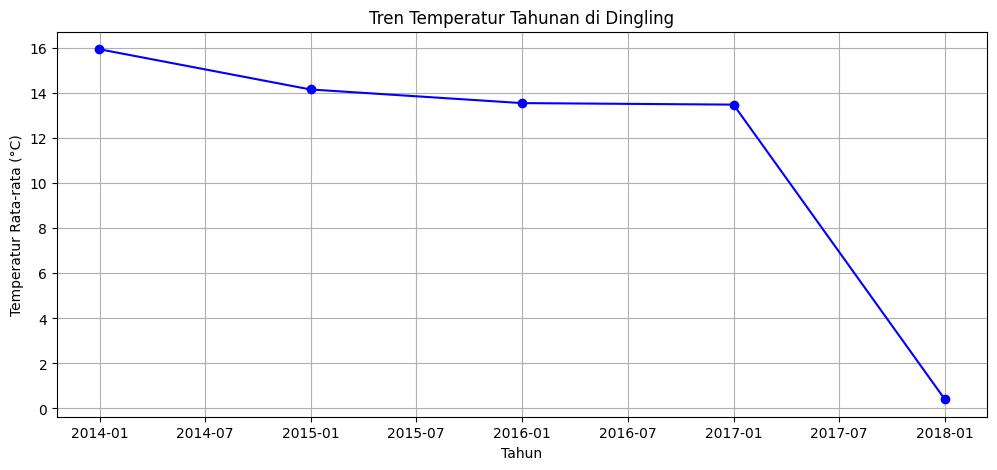

In [ ]:
temp_years = dingling_df.resample("YE").mean(numeric_only=True)

plt.figure(figsize=(12, 5))
plt.plot(temp_years.index, temp_years["TEMP"], marker="o", linestyle="-", color="b")

plt.xlabel("Tahun")
plt.ylabel("Temperatur Rata-rata (°C)")
plt.title("Tren Temperatur Tahunan di Dingling")
plt.grid()
plt.show()

plt.show()


### Pertanyaan 2: - Bagaimana tren Tekanan pada Atmosfer pada wilayah Dingling dalam periode tahun 2013 hingga 2017?

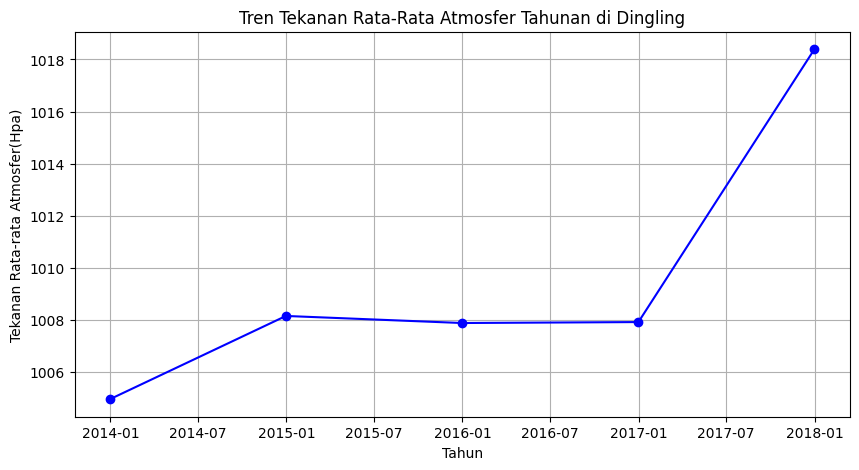

In [ ]:
temp_years = dingling_df.resample("YE").mean(numeric_only=True)

plt.figure(figsize=(10, 5))
plt.plot(temp_years.index, temp_years["PRES"], marker="o", linestyle="-", color="b")

plt.xlabel("Tahun")
plt.ylabel("Tekanan Rata-rata Atmosfer(Hpa)")
plt.title("Tren Tekanan Rata-Rata Atmosfer Tahunan di Dingling")
plt.grid()
plt.show()

plt.show()

**Insight:**
- Temperatur cuaca pada wilayah Dingling cenderung menurun dari tahun 2013 hingga 2017. Pada tahun 2015 hingga 2017 menunjukkan tempertaure yang relatif stabil meskipun terjadi sedikit penurunan. Namun terjadi penururnan tajam pada tahun 2017, dimana suhu menurun sangat drastis mendekati 0°C.
- Tekanan udara pada Stasiun Dingling mengalami peningkatan dari tahun 2013 hingga 2017. Pada awal tahun 2015 hingga awal tahun 2017 tekanan udara cenderung stabil. Peningkatan terbesar terjadi pada awal hingga akhir tahun 2017 
- Penurunan Temperatur cuaca dan Tekanan udara yang meningkat sepanjang tahun 2017 bisa menjadi indikasi bahwa terjadi musim dingin yang sangat ekstrem atau perubahan pola pada atmosfer.

## Analisis Lanjutan (Opsional)

## Conclusion

- Perubahan temperature suhu dan tekanan udara pada wilayah dingling bersifat dinamis, dengan tren suhu yang menurun dan tekanan udara yang meningkat. 
- Dengan pola korelasi yang negatif menunjukkan bahwa tekanan udara berpengaruh pada temperature suhu, hal ini ditunjukkan dengan semakin tinggi tekanan udara mengakibatkan suhu menjadi lebih rendah.
- Terjadi perubahan cuaca yang ekstrem pada periode tahun 2017 dimana temperature suhu menurun hingga 0°C dan tekanan udara yang meningkat secara drastis